In [772]:
import pandas as pd
import numpy as np
from scipy import stats
import json
import matplotlib.pyplot as plt
import ast

In [ ]:
ls ../Data/SensorInfo/

In [16]:
x=pd.read_csv("../Data/SensorInfo/201711091951")
x.columns=x.columns.map(lambda x:str(x).strip())

In [17]:
sensorNameDict=dict(zip(set(x.sensorName),[str(sensor).strip().partition(' ')[2] for sensor in (set(x.sensorName))]))

In [18]:
x['sensorName']=x['sensorName'].replace(sensorNameDict)

In [19]:
data_Accelerometer=x.loc[x.sensorName=="Accelerometer"].reset_index().drop(['index','sensorName'],axis=1)
data_Gyroscope=x.loc[x.sensorName=="Gyroscope"].reset_index().drop(['index','sensorName'],axis=1)
data_Magnetometer=x.loc[x.sensorName=="Magnetometer"].reset_index().drop(['index','sensorName'],axis=1)

In [702]:
acc=data_Accelerometer[['timestamp','lastAccelerometerValues[0]','lastAccelerometerValues[1]','lastAccelerometerValues[2]']].groupby('timestamp').mean()
gyr=data_Gyroscope[['timestamp','lastGyroscopeValues[0]','lastGyroscopeValues[1]','lastGyroscopeValues[2]']].groupby('timestamp').mean()
mag=data_Magnetometer[['timestamp','lastMagnetometerValues[0]','lastMagnetometerValues[1]','lastMagnetometerValues[2]']].groupby('timestamp').mean()

In [706]:
acc.plot()
gyr.plot()
mag.plot()

In [758]:
for idx,row in toy.iterrows():
    a=acc.query('timestamp>='+str(row['downTime'])+'and timestamp<='+str(row['eventTime']))
    g=gyr.query('timestamp>='+str(row['downTime'])+'and timestamp<='+str(row['eventTime']))
    m=mag.query('timestamp>='+str(row['downTime'])+'and timestamp<='+str(row['eventTime']))
    if len(a)>0:
        a.plot()

/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=12741920.0, right=12741920.0
  'left=%s, right=%s') % (left, right))
/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=12767850.0, right=12767850.0
  'left=%s, right=%s') % (left, right))
/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical l

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=13085334.0, right=13085334.0
  'left=%s, right=%s') % (left, right))
/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=13085998.0, right=13085998.0
  'left=%s, right=%s') % (left, right))
/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=13098178.0, right=13098178.0
  'left=%s, right=%s') % (left, right))
/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=13105421.0, right=13105421.0
  'l

In [769]:
dict(np.var(a))

{'lastAccelerometerValues[0]': 0.13658881379303389,
 'lastAccelerometerValues[1]': 0.02878597393472224,
 'lastAccelerometerValues[2]': 0.52772773821537744}

In [770]:
sc.stat

lastAccelerometerValues[0]  lastAccelerometerValues[1]  \
timestamp                                                           
13126873                     1.489304                    9.555985   
13126891                     1.445038                    9.481812   
13126911                     0.684113                    9.873032   

           lastAccelerometerValues[2]  
timestamp                              
13126873                     2.018433  
13126891                     0.667679  
13126911                     0.339874

In [750]:
mag.query('timestamp>=12687009 and timestamp<=12687076').plot()

In [749]:
gyr.query('timestamp>=12687009 and timestamp<=12687076').plot()

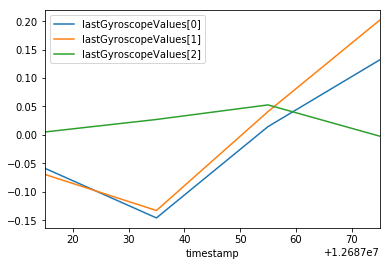

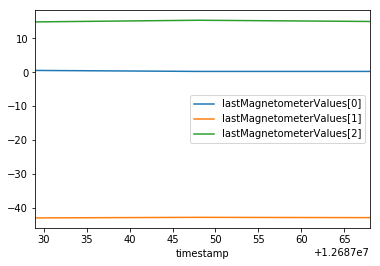

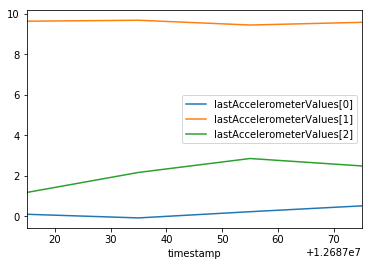

In [752]:
plt.show()

In [678]:
for idx, sample in toy.iterrows():
    for timestamp in data_Accelerometer.timestamp:
        if timestamp<sample.eventTime and timestamp>sample.downTime:
            print sample.eventTime, sample.downTime
            print data_Accelerometer.loc[data_Accelerometer['timestamp']==timestamp]
    break        

12687076.0 12687009.0
    timestamp  lastAccelerometerValues[0]  lastAccelerometerValues[1]  \
55   12687015                    0.107452                    9.624191   

    lastAccelerometerValues[2]  lastGyroscopeValues[0]  \
55                    1.183334               -0.004318   

    lastGyroscopeValues[1]  lastGyroscopeValues[2]  lastMagnetometerValues[0]  \
55                -0.01268               -0.005829                   0.323486   

    lastMagnetometerValues[1]  lastMagnetometerValues[2]  lastBtnId  
55                 -42.834473                  14.839172         -1  
12687076.0 12687009.0
    timestamp  lastAccelerometerValues[0]  lastAccelerometerValues[1]  \
56   12687035                   -0.072021                    9.672043   

    lastAccelerometerValues[2]  lastGyroscopeValues[0]  \
56                    2.169174                -0.05867   

    lastGyroscopeValues[1]  lastGyroscopeValues[2]  lastMagnetometerValues[0]  \
56               -0.069489                0.

In [670]:
toy

action  actionButton  buttonState    downTime   eventTime
1        UP           0.0   12687076.0  12687009.0  12687076.0
3        UP           0.0   12687327.0  12687310.0  12687326.0
5        UP           0.0   12687536.0  12687476.0  12687535.0
7        UP           0.0   12687787.0  12687719.0  12687786.0
9        UP           0.0   12688012.0  12687953.0  12688011.0
11       UP           0.0   12688255.0  12688187.0  12688254.0
13       UP           0.0   12688489.0  12688446.0  12688488.0
15       UP           0.0   12688734.0  12688672.0  12688731.0
17       UP           0.0   12688984.0  12688915.0  12688982.0
19       UP           0.0   12689235.0  12689174.0  12689233.0
21       UP           1.0   12690096.0  12690015.0  12690095.0
23       UP           1.0   12690347.0  12690260.0  12690344.0
25       UP           1.0   12690579.0  12690503.0  12690578.0
27       UP           1.0   12690847.0  12690753.0  12690846.0
29       UP           1.0   12691090.0  12691003.0  12691087.0
32       UP           1.0   12691357.0  12691287.0  12691355.0
34       UP           1.0   12691667.0  12691581.0  12691664.0
36       UP           1.0   12691950.0  12691882.0  12691948.0
38       UP           1.0   12692245.0  12692149.0  12692242.0
40       UP           1.0   12692493.0  12692399.0  12692491.0
42       UP           2.0   12693472.0  12693425.0  12693469.0
44       UP           2.0   12693798.0  12693747.0  12693796.0
46       UP           2.0   12694115.0  12694072.0  12694112.0
48       UP           2.0   12694440.0  12694373.0  12694438.0
50       UP           2.0   12694717.0  12694647.0  12694714.0
52       UP           2.0   12695026.0  12694950.0  12695023.0
54       UP           2.0   12695285.0  12695207.0  12695282.0
56       UP           2.0   12695545.0  12695474.0  12695541.0
58       UP           2.0   12695820.0  12695743.0  12695817.0
60       UP           2.0   12696061.0  12695992.0  12696059.0
...     ...           ...          ...         ...         ...
2859     UP         141.0   13119160.0  13119093.0  13119158.0
2861     UP         141.0   13119393.0  13119352.0  13119392.0
2863     UP         141.0   13119619.0  13119593.0  13119618.0
2865     UP         141.0   13119854.0  13119810.0  13119852.0
2867     UP         141.0   13120087.0  13120036.0  13120085.0
2869     UP         141.0   13120539.0  13120499.0  13120537.0
2871     UP         141.0   13120781.0  13120738.0  13120779.0
2873     UP         141.0   13121006.0  13120946.0  13121005.0
2875     UP         141.0   13121241.0  13121214.0  13121239.0
2877     UP         141.0   13121483.0  13121414.0  13121481.0
2879     UP         142.0   13121943.0  13121885.0  13121940.0
2881     UP         142.0   13122168.0  13122134.0  13122166.0
2883     UP         142.0   13122394.0  13122342.0  13122392.0
2885     UP         142.0   13122636.0  13122575.0  13122634.0
2887     UP         142.0   13123104.0  13123053.0  13123102.0
2889     UP         142.0   13123355.0  13123328.0  13123353.0
2891     UP         142.0   13123580.0  13123537.0  13123578.0
2893     UP         142.0   13123822.0  13123787.0  13123820.0
2895     UP         142.0   13124082.0  13124039.0  13124080.0
2897     UP         142.0   13124315.0  13124289.0  13124314.0
2899     UP         143.0   13124942.0  13124893.0  13124940.0
2901     UP         143.0   13125151.0  13125116.0  13125149.0
2903     UP         143.0   13125360.0  13125333.0  13125358.0
2905     UP         143.0   13125587.0  13125551.0  13125583.0
2907     UP         143.0   13125811.0  13125768.0  13125809.0
2909     UP         143.0   13126019.0  13125976.0  13126018.0
2911     UP         143.0   13126237.0  13126202.0  13126236.0
2913     UP         143.0   13126464.0  13126411.0  13126461.0
2915     UP         143.0   13126689.0  13126645.0  13126687.0
2917     UP         143.0   13126923.0  13126862.0  13126921.0

[1440 rows x 5 columns]

In [7]:
data_Gyroscope.timestamp[0]

191275512087387

In [660]:
data_Magnetometer

timestamp  lastAccelerometerValues[0]  lastAccelerometerValues[1]  \
0       12685966                    0.222305                    9.636154   
1       12685966                    0.215118                    9.636139   
2       12686026                    0.283325                    9.581116   
3       12686027                    0.282120                    9.540436   
4       12686027                    0.282120                    9.534454   
5       12686031                    0.295288                    9.585907   
6       12686051                    0.332367                    9.615814   
7       12686069                    0.394592                    9.638535   
8       12686089                    0.398178                    9.614609   
9       12686109                    0.288101                    9.567947   
10      12686129                    0.259384                    9.560776   
11      12686152                    0.277344                    9.538040   
12      12686169                    0.175644                    9.545227   
13      12686189                    0.227097                    9.618210   
14      12686209                    0.288116                    9.658874   
15      12686229                    0.266571                    9.650497   
16      12686249                    0.188812                    9.631363   
17      12686269                    0.179230                    9.613419   
18      12686289                    0.276138                    9.587097   
19      12686309                    0.350327                    9.601456   
20      12686329                    0.347931                    9.600250   
21      12686349                    0.288101                    9.571533   
22      12686369                    0.352707                    9.541626   
23      12686389                    0.461594                    9.541626   
24      12686409                    0.465179                    9.563171   
25      12686429                    0.367065                    9.614609   
26      12686449                    0.350327                    9.624191   
27      12686469                    0.365875                    9.628967   
28      12686488                    0.328781                    9.589493   
29      12686509                    0.310837                    9.566757   
...          ...                         ...                         ...   
22656   13138801                    0.151718                    0.129456   
22657   13138821                    0.138565                    0.113907   
22658   13138856                    0.148132                    0.115112   
22659   13138951                    0.160095                    0.121094   
22660   13138951                    0.145737                    0.123474   
22661   13138951                    0.144547                    0.131851   
22662   13138952                    0.158905                    0.122284   
22663   13138952                    0.146927                    0.122284   
22664   13138962                    0.156509                    0.122284   
22665   13138982                    0.148132                    0.109116   
22666   13139000                    0.140945                    0.118698   
22667   13139022                    0.145737                    0.119888   
22668   13139041                    0.151718                    0.125870   
22669   13139060                    0.156494                    0.121094   
22670   13139080                    0.155304                    0.128265   
22671   13139102                    0.160095                    0.130661   
22672   13139120                    0.145737                    0.124680   
22673   13139142                    0.146927                    0.134247   
22674   13139162                    0.142151                    0.118698   
22675   13139180                    0.148132                    0.113907   
22676   13139201                    0.149323           

In [10]:
x.timestamp.plot()

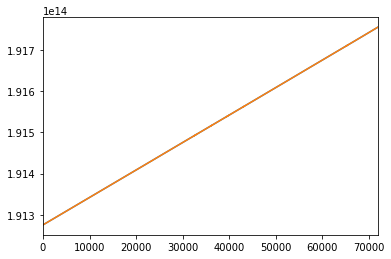

In [11]:
plt.show()

In [81]:
tapInfo=pd.read_json("../Data/TapInfo/ml16-141402-201711091951-export.json")

In [91]:
for idx, tap in tapInfo.btnID.iteritems():
    btnID=idx
    print tap
    break

{u'12687536': {u'2': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=30.971323, y[0]=59.968765, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687535, downTime=12687476, deviceId=6, source=0x1002 }']}, u'12687010': [[u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=43.959297, y[0]=59.968765, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687009, downTime=12687009, deviceId=6, source=0x1002 }']], u'12688255': {u'5': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=19.981499, y[0]=48.97449, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688254, downTime=12688187, deviceId=6, source=0x1002 }']}, u'12687954': {u'4': [u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=24.976873, y[0]=48.9744

In [88]:
tapInfo.head()

btnID
0  {u'12687536': {u'2': [u'MotionEvent { action=A...
1  {u'12691290': {u'5': [u'MotionEvent { action=A...
2  {u'12694955': {u'5': [u'MotionEvent { action=A...
3  {u'12696782': [[u'MotionEvent { action=ACTION_...
4  {u'12701418': {u'5': [u'MotionEvent { action=A...

                                                 btnID
0    {u'12687536': {u'2': [u'MotionEvent { action=A...
1    {u'12691290': {u'5': [u'MotionEvent { action=A...
2    {u'12694955': {u'5': [u'MotionEvent { action=A...
3    {u'12696782': [[u'MotionEvent { action=ACTION_...
4    {u'12701418': {u'5': [u'MotionEvent { action=A...
5    {u'12704484': {u'6': [u'MotionEvent { action=A...
6    {u'12707435': {u'6': [u'MotionEvent { action=A...
7    {u'12710888': {u'8': [u'MotionEvent { action=A...
8    {u'12713325': {u'6': [u'MotionEvent { action=A...
9    {u'12716518': {u'4': [u'MotionEvent { action=A...
10   {u'12719141': {u'3': [u'MotionEvent { action=A...
11   {u'12722181': {u'4': [u'MotionEvent { action=A...
12   {u'12725526': {u'6': [u'MotionEvent { action=A...
13   {u'12728240': {u'6': [u'MotionEvent { action=A...
14   {u'12730205': {u'3': [u'MotionEvent { action=A...
15   {u'12732318': [[u'MotionEvent { action=ACTION_...
16   {u'12735777': {u'3': [u'MotionEvent { action=A...
17   {u'12

In [352]:
x=str("{u'12687536': {u'2': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=30.971323, y[0]=59.968765, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687535, downTime=12687476, deviceId=6, source=0x1002 }']}, u'12687010': [[u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=43.959297, y[0]=59.968765, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687009, downTime=12687009, deviceId=6, source=0x1002 }']], u'12688255': {u'5': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=19.981499, y[0]=48.97449, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688254, downTime=12688187, deviceId=6, source=0x1002 }']}, u'12687954': {u'4': [u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=24.976873, y[0]=48.97449, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687953, downTime=12687953, deviceId=6, source=0x1002 }']}, u'12689176': {u'9': [u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=28.973173, y[0]=72.962, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12689174, downTime=12689174, deviceId=6, source=0x1002 }']}, u'12688012': {u'4': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=24.976873, y[0]=48.97449, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688011, downTime=12687953, deviceId=6, source=0x1002 }']}, u'12687076': [[u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=43.959297, y[0]=59.968765, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687076, downTime=12687009, deviceId=6, source=0x1002 }']], u'12688673': {u'7': [u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=19.981499, y[0]=66.96512, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688672, downTime=12688672, deviceId=6, source=0x1002 }']}, u'12689235': {u'9': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=28.973173, y[0]=72.962, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12689233, downTime=12689174, deviceId=6, source=0x1002 }']}, u'12688918': {u'8': [u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=15.985199, y[0]=65.965645, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688915, downTime=12688915, deviceId=6, source=0x1002 }']}, u'12688489': {u'6': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=17.983349, y[0]=51.97293, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688488, downTime=12688446, deviceId=6, source=0x1002 }']}, u'12687311': [[u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=53.950047, y[0]=38.9797, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687310, downTime=12687310, deviceId=6, source=0x1002 }']], u'12688188': {u'5': [u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=19.981499, y[0]=48.97449, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688187, downTime=12688187, deviceId=6, source=0x1002 }']}, u'12688448': {u'6': [u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=17.983349, y[0]=51.97293, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688446, downTime=12688446, deviceId=6, source=0x1002 }']}, u'12687327': [[u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=53.950047, y[0]=38.9797, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687326, downTime=12687310, deviceId=6, source=0x1002 }']], u'12688984': {u'8': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=15.985199, y[0]=65.965645, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688982, downTime=12688915, deviceId=6, source=0x1002 }']}, u'12687720': {u'3': [u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=28.973173, y[0]=61.967724, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687719, downTime=12687719, deviceId=6, source=0x1002 }']}, u'12687477': {u'2': [u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=30.971323, y[0]=59.968765, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687476, downTime=12687476, deviceId=6, source=0x1002 }']}, u'12687787': {u'3': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=28.973173, y[0]=61.967724, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687786, downTime=12687719, deviceId=6, source=0x1002 }']}, u'12688734': {u'7': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=19.981499, y[0]=66.96512, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688731, downTime=12688672, deviceId=6, source=0x1002 }']}}").replace('\'','\'')

row=ast.literal_eval(str(ast.literal_eval(x)[str('12687010')][0][0].replace('MotionEvent ','').replace('=','\':\'').replace(', ','\', \'').replace('{ ','{\'').replace(' }','\'}')))

In [633]:
def parse(tapInfo):
    cols=['eventTime', 'pointerCount', 'source', 'buttonState', 'actionButton', 'id0', 'historySize', 'toolType0', 'flags', 'deviceId', 'downTime', 'action', 'y0', 'x0', 'metaState', 'edgeFlags']
    df=pd.DataFrame(columns=cols)
    for btnID, btn in tapInfo.btnID.iteritems():

        sample=ast.literal_eval(str(btn).replace('u\'','\''))
        for timestamp in sample.keys():
            event=ast.literal_eval(str(sample[timestamp]))
            if type(event) is dict:
                idx = event.keys()[0]
                row=str(event[idx]) 
            else:
                idx=0
                row=str(event[0])
            t=row.replace('MotionEvent ','').replace('[','').replace(']','').replace('=','\':\'').replace(', ','\', \'').replace('\'{ ','{\'').replace(' }\'','\'}')
            dt=ast.literal_eval(t)
            dx=pd.DataFrame.from_records([dt],index=[0])
            if '2' in dx.columns:
                dx=pd.DataFrame.from_records([dx['2'][0]],index=[0]) 
            dx['action']=dx['action'][0][7:]
            dx['id0']=idx
            dx['actionButton']=int(btnID)
            dx['buttonState']=long(timestamp)
            dx['downTime']=long(dx['downTime'])
            dx['eventTime']=long(dx['eventTime'])
            df=pd.concat([df,dx],axis=0)
    df=df.sort('eventTime').reset_index().drop(['index','metaState','deviceId','edgeFlags','flags','historySize','pointerCount','source','toolType0','id0','x0','y0'],axis=1)
    return df

In [634]:
df=parse(tapInfo)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:27: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [635]:
toy=df[df['action']=='UP']

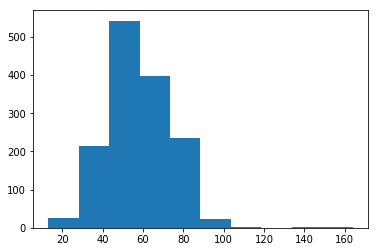

In [658]:
plt.hist(toy.eventTime-toy.downTime)
plt.show()

In [659]:
toy.eventTime-toy.downTime

1       67.0
3       16.0
5       59.0
7       67.0
9       58.0
11      67.0
13      42.0
15      59.0
17      67.0
19      59.0
21      80.0
23      84.0
25      75.0
27      93.0
29      84.0
32      68.0
34      83.0
36      66.0
38      93.0
40      92.0
42      44.0
44      49.0
46      40.0
48      65.0
50      67.0
52      73.0
54      75.0
56      67.0
58      74.0
60      67.0
        ... 
2859    65.0
2861    40.0
2863    25.0
2865    42.0
2867    49.0
2869    38.0
2871    41.0
2873    59.0
2875    25.0
2877    67.0
2879    55.0
2881    32.0
2883    50.0
2885    59.0
2887    49.0
2889    25.0
2891    41.0
2893    33.0
2895    41.0
2897    25.0
2899    47.0
2901    33.0
2903    25.0
2905    32.0
2907    41.0
2909    42.0
2911    34.0
2913    50.0
2915    42.0
2917    59.0
dtype: float64

In [612]:
toy

action  actionButton  buttonState    downTime   eventTime  id0          x0  \
0      UP           0.0   12687076.0  12687009.0  12687076.0  0.0   43.959297   
0      UP           0.0   12687327.0  12687310.0  12687326.0  0.0   53.950047   
0      UP           0.0   12687536.0  12687476.0  12687535.0  2.0   30.971323   
0      UP           0.0   12687787.0  12687719.0  12687786.0  3.0   28.973173   
0      UP           0.0   12688012.0  12687953.0  12688011.0  4.0   24.976873   
0      UP           0.0   12688255.0  12688187.0  12688254.0  5.0   19.981499   
0      UP           0.0   12688489.0  12688446.0  12688488.0  6.0   17.983349   
0      UP           0.0   12688734.0  12688672.0  12688731.0  7.0   19.981499   
0      UP           0.0   12688984.0  12688915.0  12688982.0  8.0   15.985199   
0      UP           0.0   12689235.0  12689174.0  12689233.0  9.0   28.973173   
0      UP           1.0   12690096.0  12690015.0  12690095.0  0.0    6.882515   
0      UP           1.0   12690347.0  12690260.0  12690344.0  0.0    40.85106   
0      UP           1.0   12690579.0  12690503.0  12690578.0  2.0    39.85199   
0      UP           1.0   12690847.0  12690753.0  12690846.0  3.0    31.85939   
0      UP           1.0   12691090.0  12691003.0  12691087.0  4.0   35.855682   
0      UP           1.0   12691357.0  12691287.0  12691355.0  5.0   34.856613   
0      UP           1.0   12691667.0  12691581.0  12691664.0  6.0    39.85199   
0      UP           1.0   12691950.0  12691882.0  12691948.0  7.0    40.85106   
0      UP           1.0   12692245.0  12692149.0  12692242.0  8.0   41.850143   
0      UP           1.0   12692493.0  12692399.0  12692491.0  9.0   34.856613   
0      UP           2.0   12693472.0  12693425.0  12693469.0  0.0    76.70676   
0      UP           2.0   12693798.0  12693747.0  12693796.0  0.0   80.703064   
0      UP           2.0   12694115.0  12694072.0  12694112.0  2.0   60.721558   
0      UP           2.0   12694440.0  12694373.0  12694438.0  3.0    79.70398   
0      UP           2.0   12694717.0  12694647.0  12694714.0  4.0    86.69751   
0      UP           2.0   12695026.0  12694950.0  12695023.0  5.0   103.68176   
0      UP           2.0   12695285.0  12695207.0  12695282.0  6.0    89.69473   
0      UP           2.0   12695545.0  12695474.0  12695541.0  7.0   110.67529   
0      UP           2.0   12695820.0  12695743.0  12695817.0  8.0   105.67993   
0      UP           2.0   12696061.0  12695992.0  12696059.0  9.0  115.670685   
..    ...           ...          ...         ...         ...  ...         ...   
0      UP         141.0   13119160.0  13119093.0  13119158.0  0.0    67.27106   
0      UP         141.0   13119393.0  13119352.0  13119392.0  0.0    86.25348   
0      UP         141.0   13119619.0  13119593.0  13119618.0  2.0    89.25067   
0      UP         141.0   13119854.0  13119810.0  13119852.0  3.0   76.262695   
0      UP         141.0   13120087.0  13120036.0  13120085.0  4.0   60.277527   
0      UP         141.0   13120539.0  13120499.0  13120537.0  5.0   60.277527   
0      UP         141.0   13120781.0  13120738.0  13120779.0  6.0   55.282166   
0      UP         141.0   13121006.0  13120946.0  13121005.0  7.0    75.26367   
0      UP         141.0   13121241.0  13121214.0  13121239.0  8.0    72.26642   
0      UP         141.0   13121483.0  13121414.0  13121481.0  9.0   83.256226   
0      UP         142.0   13121943.0  13121885.0  13121940.0  0.0    66.16095   
0      UP         142.0   13122168.0  13122134.0  13122166.0  0.0   51.174866   
0      UP         142.0   13122394.0  13122342.0  13122392.0  2.0   56.170227   
0      UP         142.0   13122636.0  13122575.0  13122634.0  3.0   60.166504   
0      UP         142.0   13123104.0  13123053.0  13123102.0  4.0    73.15448   
0      UP         142.0   13123355.0  13123328.0  13123353.0  5.0    61.16559   
0      UP         142.0   13123580.0  13123537.0  13123578.0  6.0   79.148926   
0      UP         142.0   13123822

In [260]:
k=row.keys()

In [261]:
y.columns=k

In [295]:
y

x[0] actionBtton   sorce eventTime pointerCont historySize flags  \
0  43.959297           0  0x1002  12687009           1           0   0x0   

  deviceId  downTime       action       y[0] bttonState metaState edgeFlags  \
0        6  12687009  ACTION_DOWN  59.968765          0         0       0x0   

  id[0]       toolType[0]  eventTimestamp  
0     0  TOOL_TYPE_FINGER        12687536

0    12687536
Name: eventTimestamp, dtype: int64

In [287]:
pd.concat(pd.DataFrame('a',columns=['eventTimestamp']))

PandasError: DataFrame constructor not properly called!